CPE628_Homework_6 ||
Lochan Basyal

PART 1

1. What are the advantages of a CNN over a fully connected deep neural network for image classification?

Convolutional Neural Networks (CNNs) are more parameter-efficient than fully connected networks due to the use of convolutional layers that share weights across the input image.

CNNs have spatial invariance, allowing them to recognize patterns in an image regardless of their position, thanks to the application of filters to the entire input image using convolutional layers.

CNNs can automatically learn useful features from input images, eliminating the need for explicit feature engineering, through the use of convolutional and pooling layers.

CNNs are translation invariant, meaning they can recognize the same object in different positions within the input image, which proves useful in object detection and localization tasks.

The use of dropout and pooling layers makes CNNs less susceptible to overfitting, thus improving their regularization capabilities.

CNNs are scalable and can handle large datasets and complex image classification tasks, being useful in various applications, such as object detection, segmentation, and recognition.

Overall, CNNs are specialized for image classification tasks and are optimized to handle the challenges of image processing tasks more efficiently than fully connected networks.

2.  Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Adding a max pooling layer instead of a convolutional layer with the same stride can help to downsize the input image and reduce computational load, memory usage, and the number of parameters in the model.

The pooling layer's objective is to decrease the risk of overfitting, making the model more robust and better able to generalize to new data.

A max pooling neuron does not use weights, but instead aggregates the inputs using a max aggregation function. This process helps to introduce translation invariance into the network and reduce overfitting by creating a more abstract representation of the input.

3. When would you want to add a local response normalization layer?

The LRN layer is often added after a convolutional layer and before a pooling layer, and it helps to prevent overfitting by introducing a degree of local inhibition into the network. This means that neurons that respond strongly to a particular input pattern will suppress the activity of their neighbors, which helps to improve the overall generalization performance of the model.

4. Test below CNN codes with MNIST data set and show the model accuracy.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')


In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(25)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

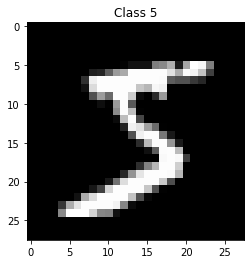

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape


(60000, 28, 28, 1)

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_24 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_20 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
train_generator.x.shape

(60000, 28, 28, 1)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
 validation_data=test_generator, validation_steps=10000//64)


Epoch 1/5
937/937 [==============================] - 237s 250ms/step - loss: 0.1432 - accuracy: 0.9559 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 2/5
937/937 [==============================] - 210s 224ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 3/5
937/937 [==============================] - 205s 219ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 4/5
937/937 [==============================] - 208s 222ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0327 - val_accuracy: 0.9882
Epoch 5/5
937/937 [==============================] - 210s 225ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9912


In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 10s 32ms/step - loss: 0.0288 - accuracy: 0.9912

Test accuracy:  0.9911999702453613


In [ ]:
predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

313/313 [==============================] - 11s 35ms/step


In [ ]:
prediction = pd.read_csv('./output_cnn.csv')
prediction.to_dict('records')

[{'Actual': 7,
  'Predictions': '[9.9693802e-11 1.6463187e-09 8.3920789e-08 8.1849389e-09 7.3324413e-09\n 3.8731816e-11 3.5448523e-12 9.9999970e-01 1.8014208e-10 1.1370400e-07]'},
 {'Actual': 2,
  'Predictions': '[8.7564018e-08 1.3308762e-08 9.9999875e-01 2.5121903e-07 9.3188202e-10\n 2.5008512e-10 8.1689343e-08 4.6111296e-07 2.0087785e-07 1.0525407e-08]'},
 {'Actual': 1,
  'Predictions': '[9.9997793e-05 9.9882287e-01 2.0397787e-05 4.8947379e-07 6.8303088e-05\n 1.1025105e-05 5.2162537e-05 8.5619197e-04 4.1776260e-05 2.6700520e-05]'},
 {'Actual': 0,
  'Predictions': '[9.9879408e-01 8.8018304e-08 5.6176214e-07 1.2628810e-07 1.2811547e-07\n 9.7537550e-06 5.6340871e-04 5.6764968e-08 1.8810513e-04 4.4377299e-04]'},
 {'Actual': 4,
  'Predictions': '[5.5265232e-09 7.1703052e-09 2.2521089e-09 3.1183247e-11 9.9998969e-01\n 2.6703312e-10 8.1674694e-09 2.8680045e-08 3.4362333e-08 1.0219931e-05]'},
 {'Actual': 1,
  'Predictions': '[1.5424092e-05 9.9994797e-01 3.6788725e-07 3.2954217e-09 4.0858158e

5. Make comments on your results in step 4.

The testing accuracy of trained convolutional neural network (CNN) model is 99.12%, which is an impressive improvement compared to the fully connected neural network (FCNN) from the previous homework assignment. This suggests that the CNN model is better suited to handle image data due to its ability to detect local features and reduce spatial dimensions with convolutional and pooling layers. The softmax values also indicate that the model is making confident and accurate predictions most of the time, with high probabilities assigned to the actual label.

Part 2:

Test CNN over the cifar10 data set, which contains 32x32 colour images from 10 classes:

1. Use the below code to load the data set.



In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


2. Show the 10 classes

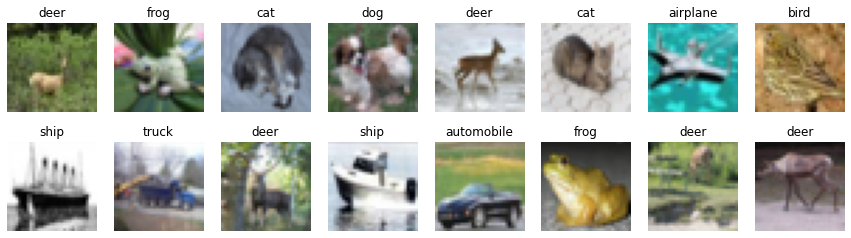

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()



3. Define a CNN architecture and train your own model by playing with the network setup: like, performs convolution, performs 2D max pooling, changing activation function from ReLU to LeakyReLU, adding dropout etc.



In [ ]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import LeakyReLU

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
number_of_classes = 10

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)


Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
my_model = Sequential()

my_model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
#my_model.add(LeakyReLU(alpha=0.1))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization(axis=-1))
my_model.add(Conv2D(32, (3, 3)))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(BatchNormalization(axis=-1))
my_model.add(Conv2D(64,(3, 3)))
my_model.add(LeakyReLU(alpha=0.1))
my_model.add(BatchNormalization(axis=-1))
my_model.add(Conv2D(64, (3, 3)))
my_model.add(LeakyReLU(alpha=0.1))


my_model.add(BatchNormalization(axis = -1))     #Normalization
my_model.add(Conv2D(128, (3,3)))
my_model.add(LeakyReLU(alpha = 0.1))        #leaky ReLU
my_model.add(BatchNormalization(axis = -1))
my_model.add(Conv2D(128, (3,3)))
my_model.add(LeakyReLU(alpha = 0.1))


my_model.add(BatchNormalization(axis=-1)) # normalization
my_model.add(Conv2D(256, (3,3)))
my_model.add(LeakyReLU(alpha=0.1)) #Leaky ReLu
my_model.add(BatchNormalization(axis=-1))
my_model.add(MaxPooling2D(pool_size=(2,2))) # max pool

my_model.add(Flatten())
# Fully connected layer

my_model.add(BatchNormalization())
my_model.add(Dense(512))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.2))  #adding dropout
my_model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
my_model.add(Activation('softmax'))

In [ ]:
my_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_26 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_52 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_27 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 




.

In [ ]:
my_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=128)
test_generator = test_gen.flow(x_test, y_test, batch_size=128)
train_generator.x.shape, train_generator.y.shape



((50000, 32, 32, 3), (50000, 10))

In [ ]:
my_model.fit(train_generator, steps_per_epoch=50000//128, epochs=5,
             validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
390/390 [==============================] - 428s 1s/step - loss: 1.5924 - accuracy: 0.4461 - val_loss: 2.1812 - val_accuracy: 0.3812
Epoch 2/5
390/390 [==============================] - 419s 1s/step - loss: 1.1561 - accuracy: 0.5978 - val_loss: 1.1532 - val_accuracy: 0.6221
Epoch 3/5
390/390 [==============================] - 430s 1s/step - loss: 0.9823 - accuracy: 0.6569 - val_loss: 1.0370 - val_accuracy: 0.6515
Epoch 4/5
390/390 [==============================] - 430s 1s/step - loss: 0.8634 - accuracy: 0.7009 - val_loss: 0.8487 - val_accuracy: 0.7056
Epoch 5/5
390/390 [==============================] - 425s 1s/step - loss: 0.7848 - accuracy: 0.7250 - val_loss: 0.8778 - val_accuracy: 0.6988
